## Create trajectory

In [3]:
import json
from ase import Atoms, io
from ase.build import molecule
import os

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ase.io import read, Trajectory, write
from ase.visualize.plot import plot_atoms
from ase.visualize import view

from functools import reduce
import numpy as np
# Use the notebook backend for interactive plots
%matplotlib widget
from qtm import chem_config

In [ ]:
# ⚠️⚠️ config cell ⚠️⚠️
step = 'step2' # folder name
coordinate_file_name='coords.txt'
traj_file_name=os.path.join("artifact", step, coordinate_file_name.replace('.txt', '.traj'))

# molecules = [chem_config.NH2, chem_config._N1_step1, chem_config._N2_step1, chem_config._N3_step1]
molecules = chem_config.step2

In [4]:
with open(os.path.join("artifact", step, coordinate_file_name)) as f:
    molecular_positions = json.load(f)

In [5]:
molecular_positions = [[*np.reshape(chem_config.Fe['coords'],(-1, 3)),
                        *np.reshape(molecular_position, (-1, 3))]
                       for molecular_position in molecular_positions] 

Create traj file

In [6]:
# Example atomic symbols
symbols = chem_config.Fe['symbols'] +  reduce(lambda x, y: x+y, [x['symbols'] for x in molecules])

# Create a Trajectory object
traj = Trajectory(traj_file_name, 'w')

# Loop through each frame and create an Atoms object
for frame in molecular_positions:    
    atoms = Atoms(symbols=symbols, positions=frame)
    traj.write(atoms, rotation="22z")

# Close the trajectory file
traj.close()

## Animate trajectory

In [3]:
!ase gui {traj_file_name}

## Create GIF

In [8]:
traj = Trajectory(traj_file_name)

MovieWriter ffmpeg unavailable; using Pillow instead.


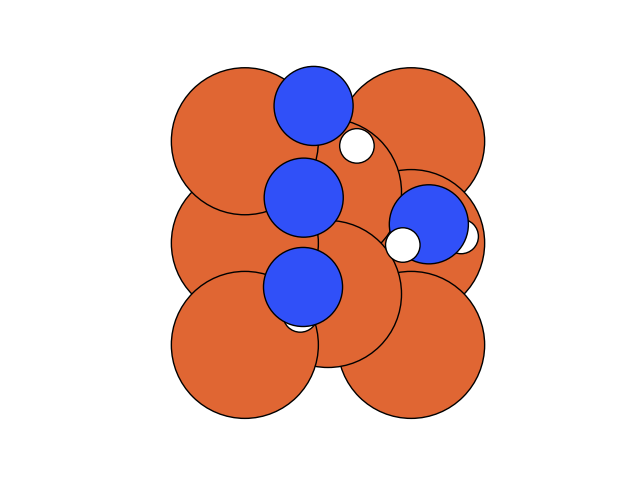

In [9]:
io.write(traj_file_name.replace(".traj", ".gif"), traj, rotation="0x,0y,180z")

## Create Fe bulk

In [6]:
from ase.build import bulk, surface
from ase.visualize import view

# Create bulk BCC iron
bulk_fe = bulk('Fe', 'bcc', a=2.856)  # lattice constant for BCC iron

# Create the (211) surface with 3 layers and 10 Å vacuum
fe_211_surface = surface(bulk_fe, (2, 1, 1), layers=3, vacuum=10.0)

# Center the surface slab in the cell
fe_211_surface.center(axis=2)

# View the structure
view(fe_211_surface, viewer='ngl')

In [7]:
#coords = [-4.3857516, 2.42202895, -4.41477892, -3.88343244,  2.62167029, -4.71856799, -4.65836314,  2.78615741, -3.9935248]

fe_top = [1.0, 0.0, 0.50]
fe_bottom = [0.69, 0.14, 0.36]
fe_climbing = [0.63, 0.58, 0.44]
fe_bridge = [0.7, 1.0, 0.44]
fe_trough = [0.59, 0.5, 0.31]


fe_lattice = Atoms(
 #   f"FeFeFeFeFeNHH",
    f"FeFeFeFeFeFeFeFe",
       [[ 2.98605559e+00,  9.14289068e-01,  1.05573008e+00],
       [ 2.98605559e+00,  2.74286720e+00,  1.05573008e+00],
       [ 2.98605559e+00,  4.57144534e+00,  1.05573008e+00],
       #[ 1.49302780e+00, -1.43551837e-16,  5.27865040e-01],
       [ 1.49302780e+00,  1.82857814e+00,  5.27865040e-01],
       [ 1.49302780e+00,  3.65715627e+00,  5.27865040e-01],
       [ 1.25981645e-16,  9.14289068e-01,  0.00000000e+00],
       [ 1.25981645e-16,  2.74286720e+00,  0.00000000e+00],
       [ 1.25981645e-16,  4.57144534e+00,  0.00000000e+00] ]
    
)

view(fe_lattice, viewer='ngl')

In [8]:
from ase import Atoms
from ase.build import fcc211, bulk
from ase.io import read, write

a = 2.586  # vertex constant

slab = fcc211('Fe', (3, 3, 1), a=a)
view(slab, viewer='ngl')

In [9]:
slab.get_positions()

array([[ 2.98605559e+00,  9.14289068e-01,  1.05573008e+00],
       [ 2.98605559e+00,  2.74286720e+00,  1.05573008e+00],
       [ 2.98605559e+00,  4.57144534e+00,  1.05573008e+00],
       [ 1.49302780e+00, -1.43551837e-16,  5.27865040e-01],
       [ 1.49302780e+00,  1.82857814e+00,  5.27865040e-01],
       [ 1.49302780e+00,  3.65715627e+00,  5.27865040e-01],
       [ 1.25981645e-16,  9.14289068e-01,  0.00000000e+00],
       [ 1.25981645e-16,  2.74286720e+00,  0.00000000e+00],
       [ 1.25981645e-16,  4.57144534e+00,  0.00000000e+00]])

In [2]:
temp_coords = "0.3971556959170808, 2.5807740683066935, 1.59450983792887, 0.9067000404676966, 2.920382841733446, 1.6919749185888644, -0.16091996606189735, 2.850757130003617, 1.599233385693058, 1.8749878093307049, 0.6605548612821897, 2.2304022467832056, 1.9526558469941664, 1.9664420965973384, 2.3020270963182066, 1.96061627556519, 3.2873361443705207, 2.3298917415531757"

temp_coords = list(map(float, temp_coords[1:-1].split(',')))

In [3]:
fe_lattice = Atoms(
    "".join(chem_config.Fe['symbols']+chem_config.NH2['symbols']+['N','N','N']),
    [*np.reshape(chem_config.Fe['coords'],(-1, 3)),
     *np.reshape(temp_coords,(-1, 3)),   
     #*np.reshape(chem_config.NH2['coords'], (-1, 3))
    ]
)

view(fe_lattice, viewer='ngl')

### step 2

In [9]:
np.hstack([x['coords'] for x in chem_config.step2]).reshape(-1,3)

array([[0.97361725, 0.99776673, 1.99935516],
       [1.99054639, 4.03343409, 1.99108501]])

In [ ]:
[-0.3, 0.99776673, 1.99935516],
[2.99054639, 4.03343409, 1.99108501]

In [18]:
fe_lattice = Atoms(
    np.hstack(chem_config.Fe['symbols']+ [x['symbols'] for x in chem_config.step2_fix] +  [x['symbols'] for x in chem_config.step2]),
    [*np.reshape(chem_config.Fe['coords'],(-1, 3)),
     *np.hstack([x['coords'] for x in chem_config.step2_fix]).reshape(-1,3),
     [-0.3, 0.99776673, 1.99935516],
     [2.99054639, 4.03343409, 1.99108501]
    ]
)

view(fe_lattice, viewer='ngl')